In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import os
import imblearn

In [2]:
main_dir = 'D:/Competitions/datastorm-2021/'


In [3]:
data_dir = main_dir+'data/feature/'
train_file = data_dir+'cb_train.csv'
val_file = data_dir+'cb_validation.csv'
test_file = data_dir+'cb_test.csv'
NN_dir = main_dir+'src/scripts/NeuralNet/'

In [4]:
train_ds = pd.read_csv(train_file)
val_ds = pd.read_csv(val_file)


In [5]:
def start_category_from_zero(df,columns):
    for each in columns:
        df[each] = df[each] - 1

    return df

In [6]:
start_category_from_zero(train_ds,['Reservation_Status'])
start_category_from_zero(val_ds,['Reservation_Status'])

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Meal_Type,Visted_Previously,Previous_Cancellations,...,Booking_channel,Required_Car_Parking,Use_Promotion,Room_Rate,month_Expected_checkin,dayofweek_Expected_checkin,stay,booking_to_checkin,total_participants,Reservation_Status
0,1,56,1,0,0,3,2,2,0,0,...,1,1,0,192,8,2,2,195,4,2
1,1,60,0,2,3,3,2,1,1,0,...,0,0,1,187,8,2,4,175,4,1
2,0,58,3,2,0,0,1,1,0,0,...,2,1,0,227,9,3,1,193,4,1
3,0,23,0,2,3,1,1,1,1,0,...,2,1,0,189,8,2,2,103,3,0
4,0,47,3,2,3,2,0,2,1,0,...,0,0,0,218,8,2,1,92,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,0,22,1,2,1,2,2,0,1,0,...,0,1,0,199,11,4,3,37,7,0
2745,0,35,1,2,3,2,1,1,0,0,...,2,0,0,106,12,4,1,154,5,1
2746,1,18,3,0,3,0,2,1,0,0,...,1,1,0,136,11,4,2,30,5,2
2747,1,42,3,2,0,3,0,2,1,1,...,0,0,0,226,11,4,1,170,6,0


In [7]:
print(train_ds['Reservation_Status'].value_counts())
train_ds.dtypes

0    21240
1     4134
2     2125
Name: Reservation_Status, dtype: int64


Gender                        int64
Age                           int64
Ethnicity                     int64
Educational_Level             int64
Income                        int64
Country_region                int64
Hotel_Type                    int64
Meal_Type                     int64
Visted_Previously             int64
Previous_Cancellations        int64
Deposit_type                  int64
Booking_channel               int64
Required_Car_Parking          int64
Use_Promotion                 int64
Room_Rate                     int64
month_Expected_checkin        int64
dayofweek_Expected_checkin    int64
stay                          int64
booking_to_checkin            int64
total_participants            int64
Reservation_Status            int64
dtype: object

In [8]:
x_columns = [x for x in train_ds.columns if x != 'Reservation_Status']
y_columns = ['Reservation_Status']
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)
batch_size = 64
input_shape = (len(x_columns))
epochs = 200
print(input_shape)

20


In [9]:
x_columns

['Gender',
 'Age',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Country_region',
 'Hotel_Type',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Booking_channel',
 'Required_Car_Parking',
 'Use_Promotion',
 'Room_Rate',
 'month_Expected_checkin',
 'dayofweek_Expected_checkin',
 'stay',
 'booking_to_checkin',
 'total_participants']

In [10]:
x_train = np.asarray(train_ds[x_columns])
y_train = np.asarray(train_ds[y_columns])
x_val = np.asarray(val_ds[x_columns])
y_val = np.asarray(val_ds[y_columns])

In [11]:
x_train.shape

(27499, 20)

In [12]:
y_train.shape

(27499, 1)

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_sm, y_train = sm.fit_resample(x_train, y_train)
x_train = pd.DataFrame(x_sm,columns=x_columns)

In [14]:
x_train.shape

(63720, 20)

In [15]:
y_train.shape

(63720,)

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv1D(64,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(64,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3,activation='softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

In [18]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer= optimizer,
    metrics=['accuracy'])

In [19]:
history = model.fit(x_train,y_train ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data = (x_val,y_val))

Epoch 1/200
996/996 [==============================] - 3s 2ms/step - loss: 1.0880 - accuracy: 0.4581 - val_loss: 1.1918 - val_accuracy: 0.4838
Epoch 2/200
996/996 [==============================] - 2s 2ms/step - loss: 0.9571 - accuracy: 0.5054 - val_loss: 1.1681 - val_accuracy: 0.4940
Epoch 3/200
996/996 [==============================] - 2s 2ms/step - loss: 0.9311 - accuracy: 0.5162 - val_loss: 1.1491 - val_accuracy: 0.4998
Epoch 4/200
996/996 [==============================] - 2s 2ms/step - loss: 0.9161 - accuracy: 0.5293 - val_loss: 1.1397 - val_accuracy: 0.5162
Epoch 5/200
996/996 [==============================] - 2s 2ms/step - loss: 0.9054 - accuracy: 0.5331 - val_loss: 1.1735 - val_accuracy: 0.5060
Epoch 6/200
996/996 [==============================] - 2s 2ms/step - loss: 0.8947 - accuracy: 0.5422 - val_loss: 1.1292 - val_accuracy: 0.5195
Epoch 7/200
996/996 [==============================] - 2s 2ms/step - loss: 0.8924 - accuracy: 0.5418 - val_loss: 1.1351 - val_accuracy: 0.5144

In [20]:
prediction_val = model.predict(x_val)
prediction_train  = model.predict(x_train)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
def func(x):
    return x.argmax()
prediction_train = np.apply_along_axis(func, 1, prediction_train)
prediction_val = np.apply_along_axis(func, 1, prediction_val)

In [23]:
y_train

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [24]:
stats =  {
    'train' : {
        'accuracy' : accuracy_score(y_train, prediction_train),
        'precision' : precision_score(y_train,prediction_train, average='macro'),
        'recall' : recall_score(y_train, prediction_train, average='macro'),
        'f1-score' : f1_score(y_train, prediction_train, average='macro')},
    'test' : {
        'accuracy' : accuracy_score(y_val, prediction_val),
        'precision' : precision_score(y_val, prediction_val, average='macro'),
        'recall' : recall_score(y_val, prediction_val, average='macro'),
        'f1-score' : f1_score(y_val, prediction_val, average='macro')
    }
}

In [25]:
print(stats)
with open(NN_dir+'score_BEFOREencode_cb.json','w') as pf:
    json.dump(stats, pf)

{'train': {'accuracy': 0.7226145637162587, 'precision': 0.7257676144085213, 'recall': 0.7226145637162587, 'f1-score': 0.7152463739957738}, 'test': {'accuracy': 0.5238268461258639, 'precision': 0.34060850819236776, 'recall': 0.3391850662437004, 'f1-score': 0.31452712528523535}}


In [26]:
import matplotlib.pyplot as plt
def acc_n_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    with open("metrics.json", 'w') as outfile:
        json.dump({"Training-accuracy": acc[-1], "Validation-accuracy": val_acc[-1], "Training-loss": loss[-1],
                   "Validation-loss": val_loss[-1]}, outfile)

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

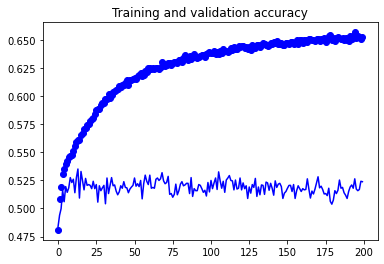

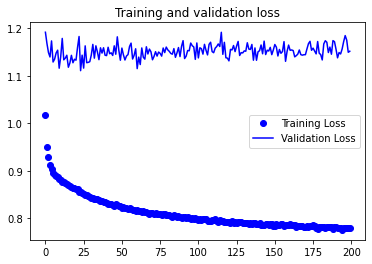

In [27]:
acc_n_loss(history)

In [28]:
test_ds = pd.read_csv(test_file)

In [29]:
test_ds

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Meal_Type,Visted_Previously,...,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Room_Rate,month_Expected_checkin,dayofweek_Expected_checkin,stay,booking_to_checkin,total_participants
0,62931593,0,52,0,0,3,2,0,2,0,...,0,2,0,0,153,11,4,1,21,6
1,70586099,0,47,0,0,3,1,1,1,0,...,0,0,1,1,210,11,4,1,104,3
2,4230648,0,28,3,0,0,1,0,0,0,...,0,1,1,0,117,4,4,3,20,4
3,25192322,0,65,1,3,3,2,1,1,0,...,0,0,0,0,107,11,4,2,182,6
4,80931528,1,45,2,2,3,2,0,0,0,...,1,1,1,1,119,11,4,2,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,39110574,1,53,0,2,1,2,2,1,1,...,2,0,0,1,153,3,2,1,199,7
4314,5496554,0,63,1,2,1,2,2,2,0,...,1,1,0,0,233,3,2,3,47,6
4315,59004046,0,59,1,0,0,1,1,1,0,...,0,2,0,1,242,3,2,1,215,5
4316,65838682,1,43,2,2,3,3,2,0,0,...,0,0,0,1,208,3,2,1,25,7


In [30]:
assert list(test_ds.iloc[:,1:].columns) == x_columns

In [31]:
x_test = np.asarray(test_ds.iloc[:,1:])

In [32]:
x_test

array([[  0,  52,   0, ...,   1,  21,   6],
       [  0,  47,   0, ...,   1, 104,   3],
       [  0,  28,   3, ...,   3,  20,   4],
       ...,
       [  0,  59,   1, ...,   1, 215,   5],
       [  1,  43,   2, ...,   1,  25,   7],
       [  0,  33,   2, ...,   1,   0,   5]], dtype=int64)

In [33]:
prediction_test = model.predict(x_test)

In [34]:
prediction_test = np.apply_along_axis(func, 1, prediction_test)

In [35]:
prediction_test

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [39]:
sub_df = pd.DataFrame()
sub_df['Reservation-id'] = test_ds.iloc[:, 0]
sub_df['Reservation_status'] = prediction_test